In [3]:
import os
import json
import re

def find_a_subset(index,feaure=14):
    
    '''To find the subset that will decrease the scaled norm with observerble difference'''
    
    file_name = f'./instance_{index}_vi_data/instance_{index}_allsubsets_scaled_norm.json'
    feature_num =14
    with open(file_name) as f:
        data = json.load(f)
    A = []      #scaled norm of each feature
    for key, value in data.items():
            #print(key)
            numbers = [int(num) for num in re.findall(r'\d+', key)]
            if  len(numbers)==1:
                #print(numbers[0],numbers[1])
                A.append(value)

    for i in range(0,feature_num):
        min_value = 1
        for key, value in data.items():
            #print(key)
            numbers = [int(num) for num in re.findall(r'\d+', key)]
            B = [A[j] for j in numbers]           #find scaled norm of each 
            #print(B)
            #if  numbers[0]==i and value<(min_value-0.02) and value<(min(B)-0.01):
                #print(numbers[0],numbers[1])
               # min_value = value
                #print('feature_subset:',numbers,'scaled norm:',value)
            
 
find_a_subset(index=4)

feature_subset: [0, 1, 4] scaled norm: 0.22369123094381235
feature_subset: [0, 1, 4, 5] scaled norm: 0.19751499792657784
feature_subset: [0, 1, 4, 5, 6] scaled norm: 0.15982035523684407
feature_subset: [0, 1, 4, 5, 6, 13] scaled norm: 0.1277773517633017
feature_subset: [0, 1, 2, 4, 5, 6, 13] scaled norm: 0.10517230779113804
feature_subset: [0, 1, 2, 3, 4, 5, 6, 13] scaled norm: 0.07261369759984836
feature_subset: [0, 1, 2, 3, 4, 5, 6, 7, 13] scaled norm: 0.03031411453731946
feature_subset: [0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13] scaled norm: 0.007930285037877544
feature_subset: [1, 2] scaled norm: 0.6235072479964184
feature_subset: [1, 4] scaled norm: 0.5991922475224455
feature_subset: [1, 2, 4] scaled norm: 0.5757477932812611
feature_subset: [1, 2, 5] scaled norm: 0.5391594286015917
feature_subset: [1, 4, 5] scaled norm: 0.5156483803875944
feature_subset: [1, 2, 4, 5] scaled norm: 0.4878585912236457
feature_subset: [1, 4, 5, 6] scaled norm: 0.467528674841193
feature_subset: [1, 2, 4, 5, 6

In [24]:
import os
import json
import re

def find_global_min(index,subset_len,non_consider_feature=[]):
    file_name = f'./instance_{index}_vi_data/instance_{index}_allsubsets_scaled_norm.json'
    subset_dic = {}
    with open(file_name) as f:
        data = json.load(f)
    A = []      #scaled norm of each feature
    for key, value in data.items():
            #print(key)
            numbers = [int(num) for num in re.findall(r'\d+', key)]
            if  len(numbers)==1:
                #print(numbers[0],numbers[1])
                A.append(value)
            
            B = [A[j] for j in numbers]             #find scaled norm of each
            flag = True
            for feature in non_consider_feature:
                if feature in numbers:
                    flag = False
                    break
    
            if len(numbers)==subset_len and flag:
            #print(key)
                subset_dic[key] = value
            else:
                continue
    
    sorted_subset_dic = dict(sorted(subset_dic.items(), key=lambda item: item[1]))
    
    keys_smallest_10_percent = list(sorted_subset_dic.items())[:int(len(sorted_subset_dic)*0.1)]
    print(A)
    for item in keys_smallest_10_percent:
        print(item)
    

find_global_min(4,4,non_consider_feature=[0])

TypeError: 'dict' object is not callable

In [2]:
partial_gradient_square = [[],[],[],
                           [118.91933550356596, 25.62523640515409, 18.178103280602798, 3.5722913263428637, 6.101069767894579, 20.675488120230625, 5.296538376569728, 0.409159135144364, 0.2640024833699073, 0.13404464475232203, 1.3722768333581072, 7.64251616516276e-05, 5.299537518078623, 1.6871743462766489],
                           [294.8004737701755, 41.363822813607996, 6.262181973496262, 7.003753251200384, 22.67701598208416, 29.39612115852763, 11.860423587290036, 5.434401170725182, 0.00992716538667704, 0.4069924695286522, 0.044604317940808436, 0.00018948467808588276, 0.45241862082406303, 11.405178774107902],
                           [323.55596783123735, 16.64309301545677, 20.664327935240934, 0.7640419085988084, 8.322414016557218, 36.0900489996741, 2.3600512407406358, 2.023149132555818, 0.3237797476085129, 1.722481500606519, 0.10121379279226961, 0.00015068922881678048, 0.9322766973094891, 6.387281114990409],
                           [157.45983793688174, 70.89748785729097, 11.937955591502295, 12.080996888847814, 1.3813578218365627, 76.4881568583596, 12.152054823915101, 69.2422304823941, 277.83891716006013, 463.53163772592507, 42.747448737332206, 0.0010596747511542048, 1.0517704107680075, 6.078212817669511],
                           [168.720901532328, 29.46125766932319, 4.582387030393619, 3.4221255025203092, 13.451189124382026, 23.610190379061436, 8.330325913829896, 2.7998516153390085, 0.544717668503587, 0.41625559521499156, 0.13671224073786448, 0.0001308019292665108, 2.2022464966648343, 8.415464387280672],
                           [167.37891943791678, 29.198008835366647, 40.415409159355704, 4.996066219754301, 8.829291399929364, 23.946218275346975, 15.183983119090573, 2.2845586409579433, 0.3054605200373466, 0.0671004910332762, 0.06929979566920608, 0.00010461815626783277, 1.4424822770397618, 3.3513871462599205],
                           [168.02886899086494, 65.5881652132378, 6.426260688289119, 10.59809381664303, 8.474466667488898, 83.40509423698936, 12.449745811425732, 67.76543203044494, 235.51206858660203, 437.86506025841334, 26.028961973722723, 0.0010640241032202624, 1.8122475535129183, 7.934658244267723],
                           [205.20092664677492, 36.047878801669455, 29.683176751851395, 1.999354533176028, 17.85126009009083, 27.19960733216971, 4.816600610601949, 0.6584128665054827, 1.9083033110109646, 8.35525979004056,0.2086733465832431, 0.0001609069527539475, 36.528259253307056, 6.644863153407666]]

篩選特徵子集

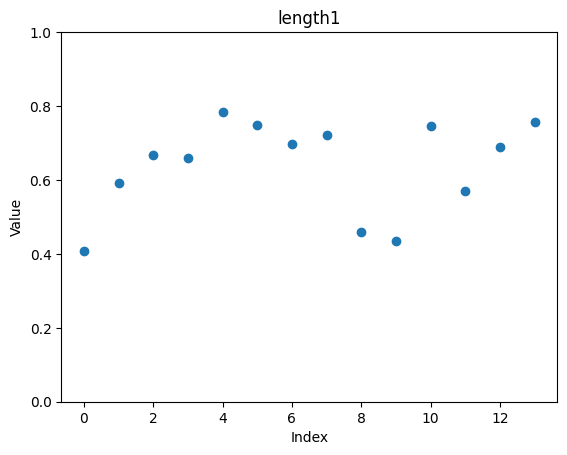

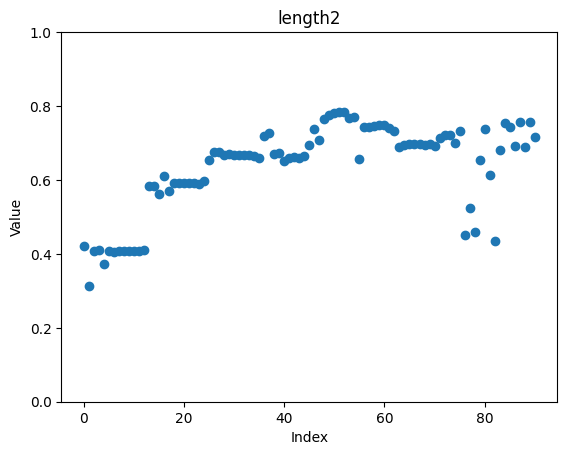

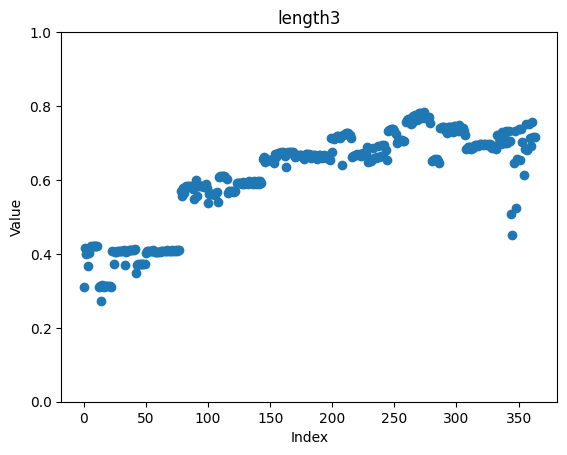

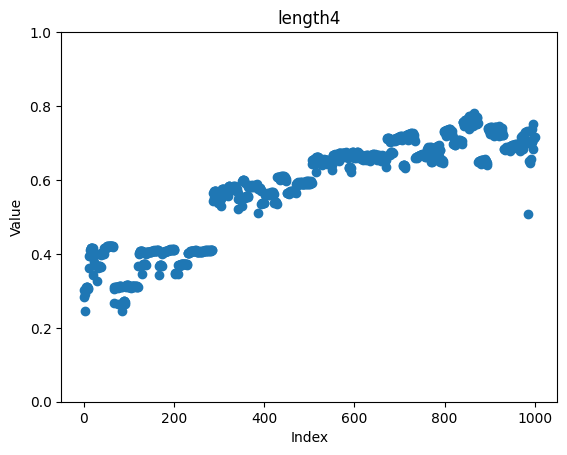

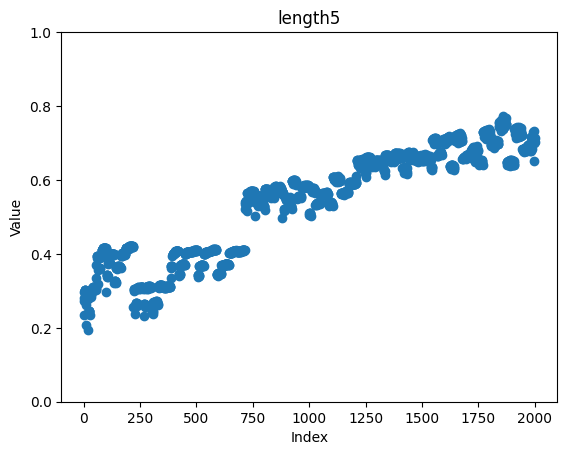

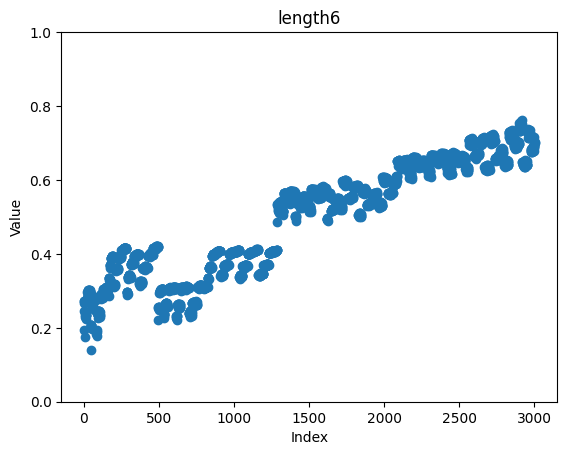

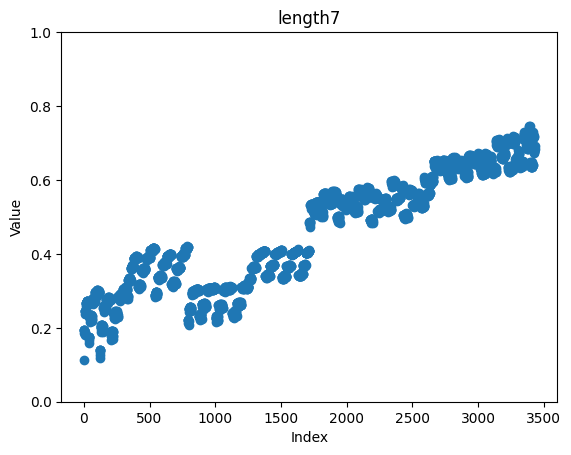

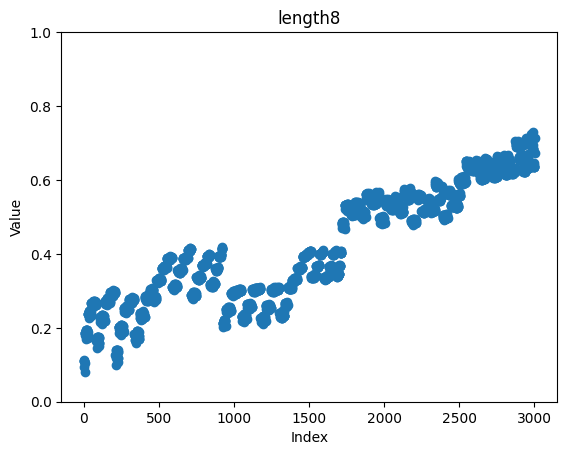

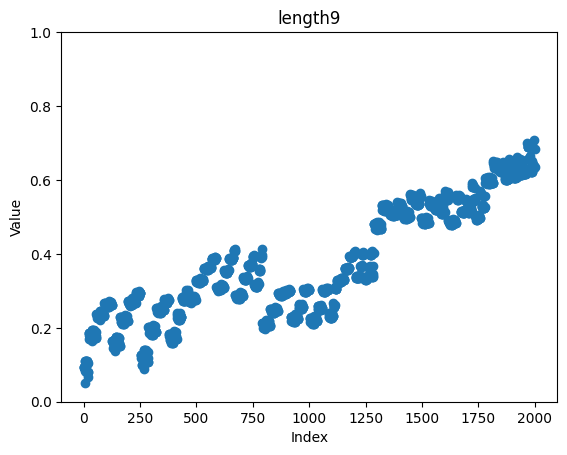

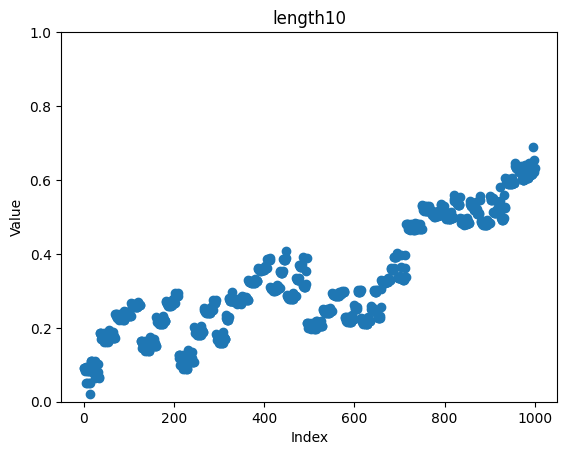

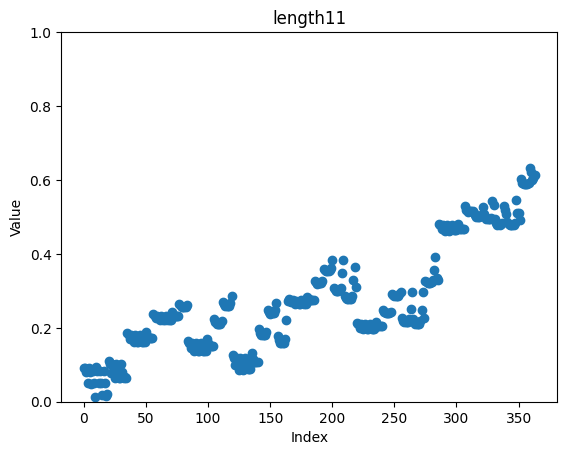

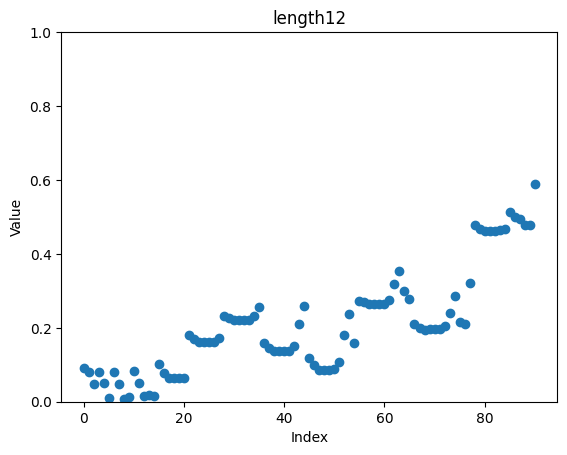

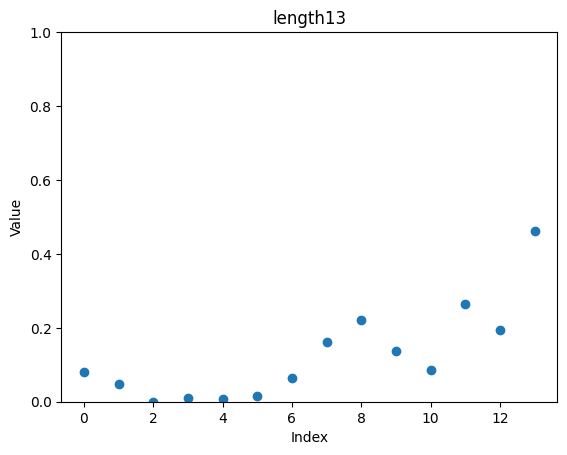

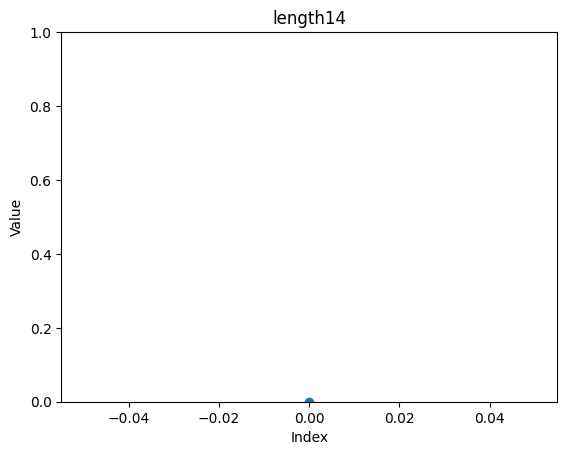

{'[0 1]': 0.42138040798626847, '[0 2]': 0.31352591809409436, '[0 3]': 0.40830903850513967, '[0 4]': 0.41016790230941497, '[0 5]': 0.37293512879335694, '[0 6]': 0.4081877391602415, '[0 7]': 0.405331547484717, '[0 8]': 0.40785863916658294, '[0 9]': 0.40801311407421154, '[ 0 10]': 0.40815889625126306, '[ 0 11]': 0.40805032709601335, '[ 0 12]': 0.40847927769299375, '[ 0 13]': 0.41127513211101546, '[1 4]': 0.5623540000601362, '[8 9]': 0.45098430616038176, '[ 8 10]': 0.5231082294012297, '[ 8 11]': 0.4594888368293645, '[ 9 11]': 0.43552598543634347}
{'[0 1 2 3 4]': 0.27336955748611014, '[0 1 2 3 5]': 0.23502876974685932, '[0 1 2 3 6]': 0.28028969047675384, '[0 1 2 4 5]': 0.20871212292609645, '[0 1 2 4 6]': 0.2606408717386714, '[0 1 2 4 7]': 0.27915178746262814, '[0 1 2 4 8]': 0.2842558928542915, '[ 0  1  2  4 10]': 0.2844146739862425, '[ 0  1  2  4 11]': 0.2844557628037366, '[ 0  1  2  4 12]': 0.28191330114298974, '[ 0  1  2  4 13]': 0.27805694833586586, '[0 1 2 5 6]': 0.1927156872029588, '[0

In [17]:
import os
import json
import numpy as np
import csv
import re
import seaborn as sns
import matplotlib.pyplot as plt
from trans import trans_json_to_dictinary, create_different_len_subset_list, generate_all_subsets
from itertools import combinations
threshold = 0.4
feature_num = 14
max_considered_subset_length = 6
index = 8
file_name = f'./instance_{index}_vi_data/instance_{index}_allsubsets_scaled_norm.json'
dict = trans_json_to_dictinary(file_name)
data = create_different_len_subset_list(dict,feature_num=feature_num,non_consider_feature=[])
#print(data)
for i in range(feature_num):
    values = list(data[i].values())
    plt.ylim(0,1)
    plt.scatter(range(len(values)), values)
    plt.title(f'length{i+1}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.show()
filtered_ab_data = []
filtered_data = []
for i in range(max_considered_subset_length):
    filtered_ab_data.append({key: value for key, value in data[i].items() if value <0.57})
    filtered_dict = {}
    for key,value in data[i].items():
        key_list = [int(num) for num in re.findall(r'\d+', key)] 
        count =0 
        flag = True
        partial_gradient_square_sum = sum(partial_gradient_square[index][j] for j in key_list)
        if i!=0:
            subsets= [np.array(subset) for subset in combinations(key_list, i)]
            #print(key_list)
            #print(subsets)
            for subset in subsets:
                partial_gradient_square_subset_sum = sum(partial_gradient_square[index][k] for k in subset)
                weight = (partial_gradient_square_subset_sum/partial_gradient_square_sum)**0.5 
                #print(weight)
                if value > dict[str(subset)]*weight:
                    flag = False
                    #filtered_dict[key] =  value
                    #print(str(subset))
            if flag:
                filtered_dict[key] = value
    filtered_data.append(filtered_dict)    
print(filtered_ab_data[1])
print(filtered_data[4])

In [5]:
from trans import generate_all_subsets
A = generate_all_subsets(5)             ##python用str(numpy.array)會把逗號去掉增加美觀
num=5
num_set = [i for i in range(num)]
num_set

[0, 1, 2, 3, 4]

(0, 1)